# Assignment 2. Music Century Classification
#### Ido Rozenzon 318320017
For this task, we will construct models to predict the century in which a music piece was released. We will utilize the "YearPredictionMSD Data Set," which is derived from the Million Song Dataset from the UCI Machine Learning Repository. Make sure you download the version of the dataset from the moodle and not from UCI. Here are some relevant links to read on this dataset:

- https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd
- http://millionsongdataset.com/pages/tasks-demos/#yearrecognition

Just like in the last assignment, it is divided to two files.
1. This file (ML_DL_Assignment2.ipynb)
2. A python functions  file which you will fill out (ML_DL_Functions2.py)

As well as the year prediction msd dataset file.

In this assignment you will mount and load the dataset and functions file from google drive. To start make sure you have both the template python functions file and the song dataset file(downloaded from the moodle) on the same directory in your google drive.

When you are finished with the assignment make sure you submit the following files:
1. this file (ML_DL_Assignment2.ipynb).
2. the functions file (ML_DL_Functions2.py).
3. the weights file from section 2.7 (assignment2_submission_optimal_weights.npy).
4. the bias file from section 2.7 (assignment2_submission_optimal_bias.npy).


Note that untill section 2.9 you are not allowed to import additional packages **(especially not PyTorch)**. One of the objectives is to understand how the training procedure actually operates, before working with PyTorch's autograd engine which does it all for us. Importing the pytorch package will deduct from your points.

## 1. Data

In [21]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sys
def reload_functions():
  if 'ML_DL_Functions2' in sys.modules:
    del sys.modules['ML_DL_Functions2']
  functions_path = drive_path.replace(" ","\ ") + 'ML_DL_Functions2.py'
  !cp $functions_path .

Just like in the last assignment you should mount your google drive and make sure you have both the dataset from the moodle('YearPredictionMSD.csv') and the functions file ('ML_DL_Functions2.py') in the same directory which you will input below:

In [22]:

from google.colab import drive
drive.mount('/content/gdrive')
drive_path = '/content/gdrive/My Drive/NotabilityG24/Intro_to_ML/Assignment2/' # TODO - UPDATE ME WITH THE TRUE PATH!
csv_path = drive_path + 'YearPredictionMSD.csv'
t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]
df = pandas.read_csv(csv_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Now that the data is loaded to your Colab notebook, you should be able to display the Pandas
DataFrame `df` as a table:

In [23]:
df

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508710,1979,42.88385,-17.41629,-13.51726,-0.75243,4.74785,14.33437,-11.75670,-10.46058,-14.91937,...,-23.01045,-169.62524,43.90683,15.45299,2.84499,94.83469,-157.26665,3.60034,54.26775,-22.24375
508711,2010,42.47120,13.16539,-6.89795,14.78750,14.72776,-12.05820,-6.56437,-7.70141,-8.01135,...,6.97510,97.98602,-45.39312,-30.26953,-9.49116,-51.58060,-12.08770,0.10696,117.82374,-1.06577
508712,2010,45.21104,-19.03522,-16.50919,19.30722,-22.23290,-25.77296,15.66504,-3.26132,1.78980,...,17.64373,27.46728,48.64159,92.03877,11.31597,-189.77886,179.06219,-3.74635,-27.01421,-10.23084
508713,2004,44.60991,29.26510,-14.79970,16.26654,-20.44287,34.93228,-8.15282,2.94035,-1.93460,...,21.30827,-183.32526,-40.60815,19.53727,12.13429,-133.10456,-158.46478,22.36919,161.58392,-18.54131


To set up our data for classification, we'll use the "year" field to represent
whether a song was released in the 20-th century. In our case `df["year"]` will be 1 if
the year was released after 2000, and 0 otherwise.

In [24]:
df["year"] = df["year"].map(lambda x: int(x > 2000))

In [25]:
df.head(20)

,year,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var81,var82,var83,var84,var85,var86,var87,var88,var89,var90
0,1,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,1,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,1,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,1,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
5,1,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263
6,1,50.57546,33.17843,50.53517,11.55217,-27.24764,-8.78206,-12.04282,-9.53930,28.61811,...,11.63681,25.44182,134.62382,21.51982,8.17570,35.46251,11.57736,4.50056,-4.62739,1.40192
7,1,48.26892,8.97526,75.23158,24.04945,-16.02105,-14.09491,8.11871,-1.87566,7.46701,...,18.03989,-58.46192,-65.56438,46.99856,-4.09602,56.37650,-18.29975,-0.30633,3.98364,-3.72556
8,1,49.75468,33.99581,56.73846,2.89581,-2.92429,-26.44413,1.71392,-0.55644,22.08594,...,18.70812,5.20391,-27.75192,17.22100,-0.85210,-15.67150,-26.36257,5.48708,-9.13495,6.08680
9,1,45.17809,46.34234,-40.65357,-2.47909,1.21253,-0.65302,-6.95536,-12.20040,17.02512,...,-4.36742,-87.55285,-70.79677,76.57355,-7.71727,3.26926,-298.49845,11.49326,-89.21804,-15.09719


### 1.1 - Train Test Split

The data set description text asks us to respect the below train/test split to
avoid the "producer effect". That is, we want to make sure that no song from a single artist
ends up in both the training and test set.

#### Food for thought:
why would it be problematic to have some songs from an artist in the training set, and other songs from the same artist in the test set. (Hint: Remember that we want our test accuracy to predict how well the model will perform in practice on a song it hasn't learned about.)

In [26]:
# train test split
df_train = df[:463715]
df_test = df[463715:]

# convert to numpy
train_xs = df_train[x_labels].to_numpy()
train_ts = df_train[t_label].to_numpy()
test_xs = df_test[x_labels].to_numpy()
test_ts = df_test[t_label].to_numpy()

### Part (b) -- 7%
Normalize the data by subtracting the mean and dividing by the std just like the last assignment.

In [27]:
# Insert your code here:
feature_means_xs = train_xs.mean(axis=0) # Calculate mean for each column
feature_stds_xs  = train_xs.std(axis=0)  # Calculate std for each column
feature_stds_xs[feature_stds_xs==0] = 0.01
train_norm_xs = (train_xs - feature_means_xs) / feature_stds_xs
test_norm_xs = (test_xs - feature_means_xs) / feature_stds_xs

### Part (c) -- 7%

Finally, we'll move some of the data in our training set into a validation set.
#### Food for thought:
Why should we limit how many times we use the test set, and how do we use the validation set during the model building process?

In [28]:
# shuffle the training set
reindex = np.random.permutation(len(train_xs))
train_xs = train_xs[reindex]
train_norm_xs = train_norm_xs[reindex]
train_ts = train_ts[reindex]

# use the first 50000 elements of `train_xs` as the validation set
train_xs, val_xs           = train_xs[50000:], train_xs[:50000]
train_norm_xs, val_norm_xs = train_norm_xs[50000:], train_norm_xs[:50000]
train_ts, val_ts           = train_ts[50000:], train_ts[:50000]

## Part 2. Classification (79%)

We will first build a *classification* model to perform decade classification. We have written a few helper functions for you. You can find them in your functions file ('sigmoid', 'cross_entropy' and 'get_accuracy'). All other code that you write in this section should be vectorized whenever possible (i.e., avoid unnecessary loops). Feel free to add more testing to the notebook to validate your code in the functions file.

### 2.1 Prediction

Fill in the function `pred` in the functions file that computes the prediction `y` based on logistic regression, i.e., a single layer with weights `w` and bias `b`. The output is given by:
\begin{equation}
y = \sigma({\bf w}^T {\bf x} + b),
\end{equation}
where the value of $y$ is an estimate of the probability that the song is released in the current century, namely ${\rm year} =1$.

In [29]:
reload_functions()
import ML_DL_Functions2
y = ML_DL_Functions2.pred(np.zeros(90), 1, np.ones([2, 90]))
y

array([0.73105858, 0.73105858])

### 2.2 Cost
Assuming the loss function is the cross entropy function fill in the cost(risk) function in the functions file which returns the mean of the loss function on all inputs.
$$\mathcal{L}_\mathcal{P}(\text{Cross Entropy}) = \mathbb{E}_{(y,t)\sim\mathcal{P}}\left\{\text{CE}(t,s)\right\}$$


In [30]:
reload_functions()
import ML_DL_Functions2
print(ML_DL_Functions2.cost(0.5*np.ones(4), np.ones(4)))

0.6931471805599453


### 2.3 Derivative of the cost -- 7%
Take a pen and paper and calculate the analytical derivative of the cost function with respect to the weights and bias. use the formula calculated to fill in the function `derivative_cost` that computes and returns the gradients
$\frac{\partial\mathcal{L}}{\partial {\bf w}}$ and
$\frac{\partial\mathcal{L}}{\partial b}$. Here, `X` is the input, `y` is the prediction, and `t` is the true label.


In [31]:
reload_functions()
import ML_DL_Functions2
dldw, dldb = ML_DL_Functions2.derivative_cost(np.ones([10,90]), np.ones(10), np.ones(10))
print(dldw.shape)
print(type(dldb))

(90,)
<class 'numpy.float64'>


### 2.4 Derivative approximation

We can check that our derivative is implemented correctly using the finite difference rule. In 1D, the
finite difference rule tells us that for small $h$, we should have

$$\frac{f(x+h) - f(x)}{h} \approx f'(x)$$

make sure that $\frac{\partial\mathcal{L}}{\partial b}$  is implement correctly
by comparing the result from `derivative_cost` with the empirical cost derivative computed using the above numerical approximation.


In [34]:
reload_functions()

import ML_DL_Functions2

h = 1e-2
# Example data

X_sample = np.random.rand(10,90)  # 10 samples, 90 features
t_sample = np.ones(10)
w_sample = np.zeros(90)
b_sample = 1

# Compute predictions
y_sample = ML_DL_Functions2.pred(w_sample, b_sample, X_sample)

# Analytical derivatives using derivative_cost
dLdw_analytical, dLdb_analytical = ML_DL_Functions2.derivative_cost(X_sample, y_sample, t_sample)

# Numerical derivative for the bias term
b_h = b_sample + h
L_bh = ML_DL_Functions2.cost(ML_DL_Functions2.pred(w_sample, b_h, X_sample), t_sample)
L_original = ML_DL_Functions2.cost(y_sample, t_sample)
dLdb_numerical = (L_bh - L_original) / h

r1 = dLdb_analytical
r2 = dLdb_numerical
print("The analytical results is -", r1)
print("The algorithm results is - ", r2)

The analytical results is - -0.2689414213699951
The algorithm results is -  -0.26795987746118244


make sure that $\frac{\partial\mathcal{L}}{\partial {\bf w}}$  is implement correctly.

In [35]:
reload_functions()
import ML_DL_Functions2
# Your code goes here. You might find this below code helpful: but it's
# up to you to figure out how/why, and how to modify the code
h = 1e-2
# Example data

X_sample = np.random.rand(10,90)  # 10 samples, 90 features
t_sample = np.ones(10)
w_sample = np.zeros(90)
b_sample = 1

y_orig = ML_DL_Functions2.pred(w_sample, b_sample, X_sample)
L_orig = ML_DL_Functions2.cost(y_orig, t_sample)
# Initialize numerical derivatives for weights
dLdw_numerical = np.zeros(w_sample.shape[0])  # Vector of length 90 for storing results for each column

for i in range(w_sample.shape[0]):  # Iterate over each column of the 90x90 matrix
    w_h = w_sample.copy()  # Extract the i-th column of the weight matrix
    w_h[i] += h                     # Add h to all cells in the column
    # Calculate the loss
    L_wh = ML_DL_Functions2.cost(ML_DL_Functions2.pred(w_h, b_sample, X_sample), t_sample)
    # Numerical derivative for the i-th column
    dLdw_numerical[i] = (L_wh - L_original) / h

r3 = dLdw_analytical
r4 = dLdw_numerical
print("The analytical results is -", r3)
print("The algorithm results is - ", r4)



The analytical results is - [-0.14251522 -0.14662548 -0.13460859 -0.13785012 -0.1747744  -0.12257551
 -0.10270306 -0.11982219 -0.09924084 -0.13167576 -0.14638159 -0.16635535
 -0.13804303 -0.12552726 -0.14759784 -0.16927996 -0.10508164 -0.13253019
 -0.16862893 -0.15210671 -0.0928452  -0.14715344 -0.124682   -0.15354348
 -0.16825679 -0.14465502 -0.13712445 -0.13899008 -0.08776564 -0.10805245
 -0.1504029  -0.14526204 -0.15273769 -0.09006328 -0.1164433  -0.12615163
 -0.1373171  -0.14969531 -0.11713819 -0.13647311 -0.1119852  -0.1574109
 -0.06928178 -0.1412904  -0.14153181 -0.15029258 -0.17252364 -0.15760817
 -0.15006715 -0.18278443 -0.15520082 -0.09418527 -0.13109047 -0.15153158
 -0.14808126 -0.14357801 -0.113211   -0.14622511 -0.12445491 -0.11471918
 -0.14476785 -0.12606807 -0.13604398 -0.08836029 -0.16425163 -0.16852301
 -0.15757137 -0.16655981 -0.16910851 -0.11058735 -0.16473635 -0.12723201
 -0.15858265 -0.13109794 -0.16394429 -0.11828335 -0.17540718 -0.1610017
 -0.11683035 -0.15579749 

### 2.5 Gradient descent

Now that you have a gradient function that works, we can actually run gradient descent.
Complete the following code that will run stochastic: gradient descent training:

In [36]:
def run_gradient_descent(w0, b0, mu=0.1, batch_size=100, max_iters=100):
    w = w0
    b = b0
    iter = 1
    max_acc = 0
    opt_w = w
    opt_b = b
    cost_list = []
    acc_list = []

    while iter < max_iters:
        # Shuffle the training set
        perm = np.random.permutation(len(train_norm_xs))
        train_norm_xs_shuffled = train_norm_xs[perm]
        train_ts_shuffled = train_ts[perm]

        for i in range(0, len(train_norm_xs), batch_size):
            X = train_norm_xs_shuffled[i:(i + batch_size)]
            t = train_ts_shuffled[i:(i + batch_size), 0]

            if np.shape(X)[0] != batch_size:
                continue

            # Compute predictions
            y = ML_DL_Functions2.pred(w, b, X)

            # Calculate gradients
            dLdw, dLdb = ML_DL_Functions2.derivative_cost(X, y, t)

            # Update weights and bias
            w -= mu * dLdw
            b -= mu * dLdb

            # Increment iteration count
            iter += 1

            # Compute validation metrics every 40 iterations
            if iter % 40 == 0:
                val_y = ML_DL_Functions2.pred(w, b, val_norm_xs)
                val_cost = ML_DL_Functions2.cost(val_y, val_ts[:, 0])
                val_acc = ML_DL_Functions2.get_accuracy(val_y, val_ts[:, 0])
                cost_list.append(val_cost)
                acc_list.append(val_acc)

                if val_acc > max_acc:
                    opt_w = w
                    opt_b = b

                print("Iter %d. [Val Acc %.0f%%, Loss %f]" % (
                    iter, val_acc * 100, val_cost))

            if iter >= max_iters:
                break

    return opt_w, opt_b, cost_list, acc_list


### 2.6 Running everything!

Call `run_gradient_descent` with the weights and biases all initialized to zero. Test your self with different $\mu$ values and show that if mu is too small then convergance is slow and if mu is too large then the optimization algorithm does not converge. You can add more automation and plot function to help you find the best configuration.

Iter 40. [Val Acc 67%, Loss 0.671712]
Iter 80. [Val Acc 67%, Loss 0.657925]
Iter 120. [Val Acc 68%, Loss 0.647366]
Iter 160. [Val Acc 69%, Loss 0.638759]
Iter 200. [Val Acc 69%, Loss 0.632258]
Iter 240. [Val Acc 70%, Loss 0.627314]
Iter 280. [Val Acc 70%, Loss 0.622443]
Iter 320. [Val Acc 70%, Loss 0.618343]
Iter 360. [Val Acc 70%, Loss 0.614279]
Iter 400. [Val Acc 70%, Loss 0.611146]
Iter 440. [Val Acc 70%, Loss 0.608214]
Iter 480. [Val Acc 70%, Loss 0.605576]
Iter 520. [Val Acc 70%, Loss 0.603273]
Iter 560. [Val Acc 71%, Loss 0.600797]
Iter 600. [Val Acc 71%, Loss 0.598779]
Iter 640. [Val Acc 71%, Loss 0.596734]
Iter 680. [Val Acc 71%, Loss 0.595253]
Iter 720. [Val Acc 71%, Loss 0.593585]
Iter 760. [Val Acc 71%, Loss 0.592040]
Iter 800. [Val Acc 71%, Loss 0.590810]
Iter 840. [Val Acc 71%, Loss 0.589780]
Iter 880. [Val Acc 71%, Loss 0.588184]
Iter 920. [Val Acc 72%, Loss 0.587234]
Iter 960. [Val Acc 71%, Loss 0.586068]
Iter 1000. [Val Acc 72%, Loss 0.585015]
Iter 1040. [Val Acc 72%, L

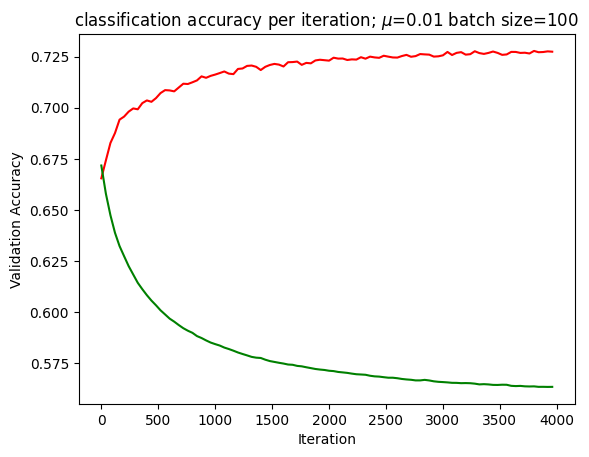

In [38]:
# Reload functions to ensure we use the latest implementations
reload_functions()
import ML_DL_Functions2
import matplotlib.pyplot as plt

# Initialize weights and bias
w0 = np.zeros(90)  # Initial weights (90 features, all set to zero)
b0 = np.zeros(1)[0]  # Initial bias (scalar, set to zero)

# Choose hyperparameters
mu = 0.01  # Learning rate
max_iters = 4000  # Maximum iterations
batch_size = 100  # Minibatch size

# Run gradient descent
opt_w, opt_b, cost_list, acc_list = run_gradient_descent(w0, b0, mu, batch_size, max_iters)

# Plot validation accuracy over iterations
plt.plot(range(0, max_iters, 40), acc_list, "r-")
plt.plot(range(0,max_iters,40),cost_list,"g-")
plt.title("classification accuracy per iteration; $\mu$=" + str(mu) + " batch size=" + str(batch_size))
plt.xlabel("Iteration")
plt.ylabel("Validation Accuracy")
plt.show()


### 2.7 Finding and saving optimal values

Find the optimal value of ${\bf w}$ and $b$ in the means of accuracy using your code. Notice that the choice of $\mu$ and the batch size are important for this. Run the code below to save these parameters to a file in your google drive directory. submit to the moodle (alongside this file and the functions file) both the
"assignment2_submission_optimal_weights.npy" file and "assignment2_submission_optimal_bias.npy" file.

In [39]:
#change these to the optimal weights and biases, leave the name the same
np.save(drive_path+"assignment2_submission_optimal_weights.npy",opt_w)
np.save(drive_path+"assignment2_submission_optimal_bias.npy",opt_b)

### 2.8 Results

Using the values of `w` and `b` from part 2.7, compute your training accuracy, validation accuracy,
and test accuracy. Are there any differences between those three values? If so, why?

In [40]:
# Load saved weights and biases
w = np.load(drive_path + "assignment2_submission_optimal_weights.npy")
b = np.load(drive_path + "assignment2_submission_optimal_bias.npy")

# Compute training accuracy
train_predictions = ML_DL_Functions2.pred(w, b, train_norm_xs)
train_acc = ML_DL_Functions2.get_accuracy(train_predictions, train_ts[:, 0])

# Compute validation accuracy
val_predictions = ML_DL_Functions2.pred(w, b, val_norm_xs)
val_acc = ML_DL_Functions2.get_accuracy(val_predictions, val_ts[:, 0])

# Compute test accuracy
test_predictions = ML_DL_Functions2.pred(w, b, test_norm_xs)
test_acc = ML_DL_Functions2.get_accuracy(test_predictions, test_ts[:, 0])

# Print results
print('train_acc = ', train_acc, ' val_acc = ', val_acc, ' test_acc = ', test_acc)


train_acc =  0.7311506713558851  val_acc =  0.72744  test_acc =  0.7237777777777777


### 2.9 Using Pytorch
Writing a classifier like this is instructive, and helps you understand what happens when
we train a model. However, in practice, we rarely write model building and training code
from scratch. Instead, we typically use one of the well-tested libraries available in a package. The following example showes you how this task could have been achieved using the deep learning library, pytorch. The library greatly simplifies the steps needed to create a learning model. Though there is nothing you need to complete in this section we suggest you read this section thoroughly and make sure you understand all the code. In the next assignment you will need to build a deep learning model yourself.

The first step required to use the pytorch module is to create a class which will be our model. in this case we will use a linear layer with a costum size(in your assignment you used a 90,1 linear layer meaning an input size of 90 and an output size of 1). We also add a sigmoid function to restrict the values between 0 and 1.

The forward function is called everytime you call the model by name. It is equivalent to the prediction function you wrote but it serves another purpose since it saves all the operations done to the tensor which can then be used to calculate the gradients.

In [41]:
import torch
class single_layer(torch.nn.Module):
  def __init__(self,input_size,output_size):
    super(single_layer,self).__init__()
    self.neuron = torch.nn.Linear(input_size,output_size)
    self.sigmoid = torch.nn.Sigmoid()

  def forward(self,X):
    out = self.neuron(X)
    out = self.sigmoid(out)
    return out


We can now create a new model.

we don't have to write the binary cross entropy loss since it is already written for us(criterion).

Also instead of writing the optimzation proccess which in our case was gradient descent(W[n+1] = w[n]-$\mu$dL/dW) we can use a pre built optimizer(SGD).

In [42]:
model = single_layer(90,1)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.05)

There are a few pre-built training functions but usually the training function is written by hand. this function is similar to the one you wrote in this assignment only we now can use the pre-built tensor functions. Make sure you understood all the differences between the two:

In [43]:
import pdb
def train_model(model, criterion, optimizer, batch_size=100, max_iters=100):
  iter = 0
  cost_list = []
  acc_list  = []
  train_norm_xs_shuff = train_norm_xs
  train_ts_shuff = train_ts
  val_X_tensor = torch.tensor(val_norm_xs,dtype=torch.float32)
  while iter < max_iters:
    # shuffle the training set (there is code above for how to do this)
    reindex = np.random.permutation(len(train_norm_xs))
    train_norm_xs_shuff = train_norm_xs_shuff[reindex]
    train_ts_shuff = train_ts_shuff[reindex]

    for i in range(0, len(train_norm_xs), batch_size): # iterate over each minibatch
      # minibatch that we are working with:
      X = train_norm_xs_shuff[i:(i + batch_size)]
      t = train_ts_shuff[i:(i + batch_size), 0]

      # since len(train_norm_xs) does not divide batch_size evenly, we will skip over
      # the "last" minibatch
      if np.shape(X)[0] != batch_size:
        continue
      # change the numpy types into torches tensors
      X_tensor = torch.tensor(X,dtype=torch.float32)
      t_tensor = torch.tensor(t,dtype=torch.float32).unsqueeze(1) # the unsqueeze reshapes (N,) to (N,1)

      # a clean up step for PyTorch
      optimizer.zero_grad()
      # compute the prediction
      prediction = model(X_tensor)
      # compute the cost/loss
      loss = criterion(prediction,t_tensor)
      # calculate gradient(backpropegate)
      loss.backward()
      # update w and b(step)
      optimizer.step()
      # increment the iteration count
      iter += 1
      # compute and print the *validation* accuracy
      if (iter % 40 == 0):
        val_pred = model(val_X_tensor)
        val_acc = ML_DL_Functions2.get_accuracy(val_pred,val_ts)
        acc_list.append(val_acc)

        print("Iter %d. [Val Acc %.1f%%]" % (
                iter, val_acc * 100))

      if iter >= max_iters:
        break


  return acc_list


We can now run the training proccess. You should get pretty similar results to the ones from the model you wrote. Make sure that the results are in the same range and if not fix your model and try again.

In [44]:
reload_functions()
import ML_DL_Functions2
acc_list = train_model(model,criterion,optimizer,100,500)

Iter 40. [Val Acc 65.6%]
Iter 80. [Val Acc 68.6%]
Iter 120. [Val Acc 69.8%]
Iter 160. [Val Acc 70.5%]
Iter 200. [Val Acc 71.1%]
Iter 240. [Val Acc 71.7%]
Iter 280. [Val Acc 71.3%]
Iter 320. [Val Acc 71.8%]
Iter 360. [Val Acc 71.9%]
Iter 400. [Val Acc 71.8%]
Iter 440. [Val Acc 72.1%]
Iter 480. [Val Acc 72.1%]


You can also try to change the model(add layers or change layers) change the optimizer or the hyperparameters and try to improve the validation accuracy. If you want a challenge you can try reach a validation accuracy of 75%